In [3]:
import pandas as pd

In [ ]:

# Business Understanding:
# O objetivo deste projeto é realizar uma análise preditiva utilizando o banco de dados de um condomínio de médio porte.
# Serão ilustradas análises simples, como previsão orçamentária mensal, identificação de padrões de inadimplência e simulação de cenários.
# O intuito é auxiliar na tomada de decisão financeira, reduzir a inadimplência por meio da identificação antecipada de risco,
# além de otimizar a previsão orçamentária e o uso do orçamento.
# O banco de dados utilizado é fiel à realidade de um condomínio, porém, para proteger os dados dos moradores,
# algumas colunas e valores foram alterados, tornando-o fictício, mas mantendo características de um condomínio real,
# incluindo informações sobre moradores, inadimplência, previsão orçamentária e uso do orçamento.
# O intuito da análise é auxiliar, síndicos, administradores condominiais e conselhos fiscais na tomada de decisão financeira
#Granularidade do dataset, cada linha representa o registro mensal de uma unidade(apartamento ou loja)

In [5]:
predio = pd.read_csv("condominio.csv")
predio.head(5)

,data,unidade_id,tipo_unidade,metragem,valor_cota,pagou,dias_atraso,valor_pago,despesa_total,obra_extraordinaria
0,2020-01-01,Apt001,apartamento,39,556.45,True,0,556.45,33048.316687,0.0
1,2020-01-01,Apt002,apartamento,55,619.22,True,0,619.22,33048.316687,0.0
2,2020-01-01,Apt003,apartamento,39,568.89,True,0,568.89,33048.316687,0.0
3,2020-01-01,Apt004,apartamento,39,572.01,True,0,572.01,33048.316687,0.0
4,2020-01-01,Apt005,apartamento,39,575.91,False,30,243.17,33048.316687,0.0


In [6]:
#identificando colunas 
print(predio.columns)

Index(['data', 'unidade_id', 'tipo_unidade', 'metragem', 'valor_cota', 'pagou',
       'dias_atraso', 'valor_pago', 'despesa_total', 'obra_extraordinaria'],
      dtype='object')


In [7]:
predio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20460 entries, 0 to 20459
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   data                 20460 non-null  object 
 1   unidade_id           20460 non-null  object 
 2   tipo_unidade         20460 non-null  object 
 3   metragem             20460 non-null  int64  
 4   valor_cota           20460 non-null  float64
 5   pagou                20460 non-null  bool   
 6   dias_atraso          20460 non-null  int64  
 7   valor_pago           20460 non-null  float64
 8   despesa_total        20460 non-null  float64
 9   obra_extraordinaria  20460 non-null  float64
dtypes: bool(1), float64(4), int64(2), object(3)
memory usage: 1.4+ MB


In [8]:
#tamanho do dataset condominio
predio.shape

(20460, 10)

In [9]:
## descrição estatística basica das variaveis numéricas 
predio.describe()

,metragem,valor_cota,dias_atraso,valor_pago,despesa_total,obra_extraordinaria
count,20460.000000,20460.000000,20460.000000,20460.000000,20460.000000,20460.000000
mean,40.263930,592.741355,2.828055,574.635664,34636.468926,5126.965996
std,6.575741,143.836841,10.192461,153.703353,5778.774352,11315.212579
min,20.000000,464.100000,0.000000,194.970000,25553.998702,0.000000
25%,39.000000,513.367500,0.000000,504.332500,29234.471499,0.000000
50%,39.000000,547.670000,0.000000,541.980000,35187.251581,0.000000
75%,39.000000,583.455000,0.000000,581.032500,39099.060889,0.000000
max,60.000000,1099.770000,60.000000,1099.770000,44714.364423,36955.394564


In [10]:
## verificando se existem valores nulos
predio.isnull().sum()


data                   0
unidade_id             0
tipo_unidade           0
metragem               0
valor_cota             0
pagou                  0
dias_atraso            0
valor_pago             0
despesa_total          0
obra_extraordinaria    0
dtype: int64

In [11]:
predio.head(3)

,data,unidade_id,tipo_unidade,metragem,valor_cota,pagou,dias_atraso,valor_pago,despesa_total,obra_extraordinaria
0,2020-01-01,Apt001,apartamento,39,556.45,True,0,556.45,33048.316687,0.0
1,2020-01-01,Apt002,apartamento,55,619.22,True,0,619.22,33048.316687,0.0
2,2020-01-01,Apt003,apartamento,39,568.89,True,0,568.89,33048.316687,0.0


In [12]:
## quantos tipos de unidades existem no predio
print(predio['tipo_unidade'].unique())

['apartamento' 'loja']


In [13]:
#### Verificando os tipos de dados
predio.dtypes

data                    object
unidade_id              object
tipo_unidade            object
metragem                 int64
valor_cota             float64
pagou                     bool
dias_atraso              int64
valor_pago             float64
despesa_total          float64
obra_extraordinaria    float64
dtype: object

In [14]:
### Quantidade de unidades no condomínio e período de amostragem
print(f'Quantidade de registros: {predio.shape[0]}')
print(f'Quantidade de unidades: {predio["unidade_id"].nunique()}')
print(f'Periodo dos dados: {pd.to_datetime(predio["data"]).min()} a {pd.to_datetime(predio["data"]).max()}')


Quantidade de registros: 20460
Quantidade de unidades: 341
Periodo dos dados: 2020-01-01 00:00:00 a 2024-12-01 00:00:00


In [15]:
### Entendendo a média de inadimplencia por tipo de unidade
predio['pagou'].mean
predio.groupby("tipo_unidade")["pagou"].mean()

tipo_unidade
apartamento    0.906341
loja           0.904924
Name: pagou, dtype: float64

In [16]:
### Mostrando somente as unidades com inadimplência
### Criando uma nova coluna pagou_num para facilitar a análise com valores numéricos
### Usando medias para separar inadimplentes em grupos
### 0.9 a 0.8 inadimplentes leves
### 0.8 a 0.5 inadimplentes costumazes  
### 0.2 a 0.0 inadimplentes cronicos
### Esse código classifica os inadimplentes em tres categorias: Sendo inadimplentes leves aqueles que pagaram entre 80% e 90% das vezes,
### inadimplentes costumazes aqueles que pagaram entre 20% e 70% das vezes, e inadimplentes cronicos aqueles que pagaram menos de 20% das vezes.

predio['pagou_num'] = predio['pagou'].astype(int)

inadimplencia = predio.groupby("unidade_id")["pagou_num"].mean()
inadimplentes_leve = inadimplencia[(inadimplencia < 0.9) & (inadimplencia > 0.8)]
inadimplentes_costumazes = inadimplencia[(inadimplencia < 0.7) & (inadimplencia > 0.2)]
inadimplentes_cronicos = inadimplencia[(inadimplencia < 0.2) & (inadimplencia > 0.0)]

print('Inadimplentes leves', inadimplentes_leve)
print('Inadimplentes costumazes', inadimplentes_costumazes)
print('inadimplente cronicos', inadimplentes_cronicos)



Inadimplentes leves unidade_id
Apt040    0.866667
Apt105    0.866667
Apt130    0.883333
Apt221    0.883333
Apt225    0.883333
Name: pagou_num, dtype: float64
Inadimplentes costumazes unidade_id
Apt056    0.283333
Apt216    0.233333
Apt230    0.233333
Name: pagou_num, dtype: float64
inadimplente cronicos unidade_id
Apt005     0.133333
Apt022     0.100000
Apt050     0.183333
Apt063     0.033333
Apt079     0.166667
Apt098     0.116667
Apt101     0.133333
Apt103     0.083333
Apt150     0.166667
Apt215     0.150000
Apt237     0.083333
Apt241     0.083333
Apt251     0.166667
Apt277     0.150000
Apt284     0.133333
Apt285     0.116667
Loja009    0.133333
Loja024    0.183333
Loja028    0.150000
Name: pagou_num, dtype: float64


In [17]:

import matplotlib.pyplot as plt
import seaborn as snsplt


In [18]:
import pandas as pd

# Carregar o dataset para garantir o estado inicial se o ambiente for novo
# Isso é importante caso o ambiente tenha sido reiniciado, para garantir que 'predio' existe
predio = pd.read_csv('condominio.csv')
predio['pagou_num'] = predio['pagou'].astype(int)

# Calcular a média de pagamento por unidade
media_pagamento_por_unidade = predio.groupby("unidade_id")["pagou_num"].mean()

# Converter a Series para DataFrame e renomear
df_media_pagamento = media_pagamento_por_unidade.reset_index()
df_media_pagamento.rename(columns={'pagou_num': 'media_pagamento_unidade'}, inplace=True)

# Incorporar a coluna ao DataFrame 'predio'
predio = pd.merge(predio, df_media_pagamento, on='unidade_id', how='left')

# Exibir as primeiras linhas do DataFrame atualizado
print("DataFrame 'predio' com a coluna 'media_pagamento_unidade' incorporada:")
print(predio.head())

DataFrame 'predio' com a coluna 'media_pagamento_unidade' incorporada:
         data unidade_id tipo_unidade  metragem  valor_cota  pagou  \
0  2020-01-01     Apt001  apartamento        39      556.45   True   
1  2020-01-01     Apt002  apartamento        55      619.22   True   
2  2020-01-01     Apt003  apartamento        39      568.89   True   
3  2020-01-01     Apt004  apartamento        39      572.01   True   
4  2020-01-01     Apt005  apartamento        39      575.91  False   

   dias_atraso  valor_pago  despesa_total  obra_extraordinaria  pagou_num  \
0            0      556.45   33048.316687                  0.0          1   
1            0      619.22   33048.316687                  0.0          1   
2            0      568.89   33048.316687                  0.0          1   
3            0      572.01   33048.316687                  0.0          1   
4           30      243.17   33048.316687                  0.0          0   

   media_pagamento_unidade  
0               

In [19]:
predio

,data,unidade_id,tipo_unidade,metragem,valor_cota,pagou,dias_atraso,valor_pago,despesa_total,obra_extraordinaria,pagou_num,media_pagamento_unidade
0,2020-01-01,Apt001,apartamento,39,556.45,True,0,556.45,33048.316687,0.0,1,0.950000
1,2020-01-01,Apt002,apartamento,55,619.22,True,0,619.22,33048.316687,0.0,1,0.983333
2,2020-01-01,Apt003,apartamento,39,568.89,True,0,568.89,33048.316687,0.0,1,0.950000
3,2020-01-01,Apt004,apartamento,39,572.01,True,0,572.01,33048.316687,0.0,1,0.966667
4,2020-01-01,Apt005,apartamento,39,575.91,False,30,243.17,33048.316687,0.0,0,0.133333
...,...,...,...,...,...,...,...,...,...,...,...,...
20455,2024-12-01,Loja040,loja,40,978.27,True,0,978.27,36792.517030,0.0,1,0.950000
20456,2024-12-01,Loja041,loja,60,1039.55,True,0,1039.55,36792.517030,0.0,1,1.000000
20457,2024-12-01,Loja042,loja,20,840.42,True,0,840.42,36792.517030,0.0,1,0.983333
20458,2024-12-01,Loja043,loja,60,1012.52,True,0,1012.52,36792.517030,0.0,1,0.983333


In [20]:
### exportar odataset atualizado com a nova coluna em csv e preservar o arquivo original
predio.to_csv('condominio_atualizado.csv', index=False)

<Figure size 1000x700 with 0 Axes>

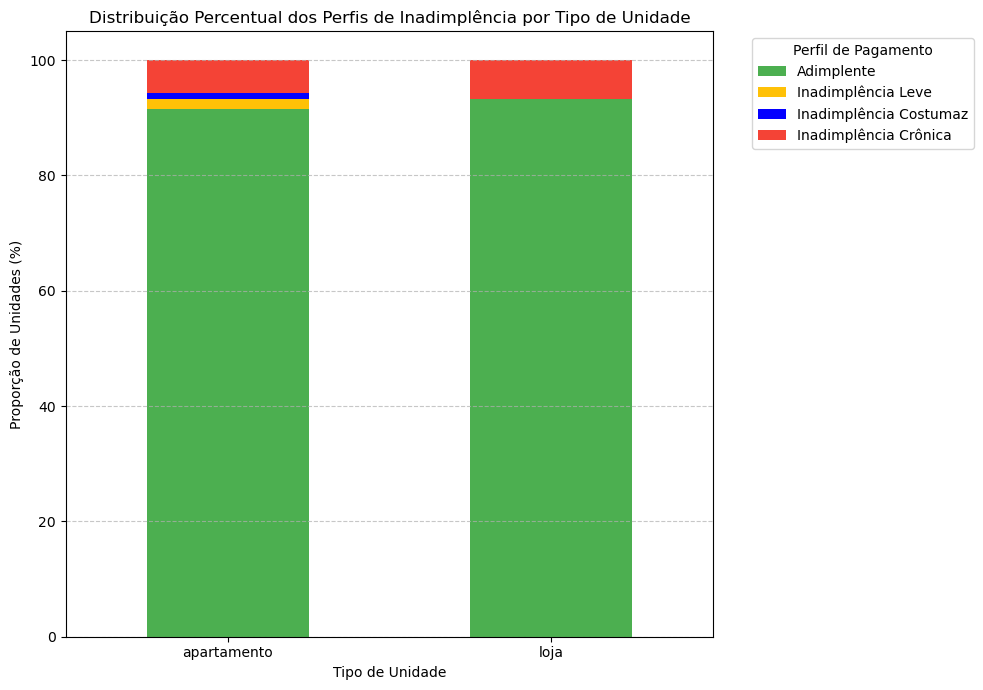

In [46]:

### Carregar o dataset atualizado 
predio = pd.read_csv('condominio_atualizado.csv')
# Converter a coluna 'pagou' para numérica
predio['pagou_num'] = predio['pagou'].astype(int)
inadimplencia_por_unidade = predio.groupby("unidade_id")["pagou_num"].mean()
unidades_info = predio[['unidade_id', 'tipo_unidade']].drop_duplicates(subset=['unidade_id'])
df_inadimplencia_com_tipo = pd.merge(
    inadimplencia_por_unidade.reset_index(),
    unidades_info,
    on='unidade_id',
    how='left'
)
df_inadimplencia_com_tipo.rename(columns={'pagou_num': 'media_pagamento'}, inplace=True)


### Função para classificar o grupo de inadimplência com base na média de pagamento e usar de legenda no gráfico
def classificar_grupo_inadimplencia(media):
    if media >= 0.9:
        return 'Adimplente'
    elif 0.7 < media < 0.9:
        return 'Inadimplência Leve'
    elif 0.2 < media <= 0.7:
        return 'Inadimplência Costumaz'
    else: # media <= 0.2
        return 'Inadimplência Crônica'

df_inadimplencia_com_tipo['grupo_inadimplencia'] = df_inadimplencia_com_tipo['media_pagamento'].apply(classificar_grupo_inadimplencia)


### Grafico de barras empilhadas para mostrar a distribuição percentual dos perfis de inadimplência por tipo de unidade
ordem_grupos = ['Adimplente', 'Inadimplência Leve', 'Inadimplência Costumaz', 'Inadimplência Crônica']
cores_grupos = {
    'Adimplente': '#4CAF50', # Verde
    'Inadimplência Leve': '#FFC107', # Amarelo
    'Inadimplência Costumaz': "#0400FF", # Azul 
    'Inadimplência Crônica': '#F44336' # Vermelho
}
# Criar a tabela de contingência para as contagens
# `normalize='index'` mostra a proporção percentual dentro de cada tipo de unidade
tabela_grupos_tipo = pd.crosstab(
    df_inadimplencia_com_tipo['tipo_unidade'],
    df_inadimplencia_com_tipo['grupo_inadimplencia']
).reindex(columns=ordem_grupos, fill_value=0) # Garante a ordem e preenche vazios com 0
tabela_grupos_tipo_pct = tabela_grupos_tipo.div(tabela_grupos_tipo.sum(axis=1), axis=0) * 100


plt.figure(figsize=(10, 7))

# Plotar o gráfico de barras empilhadas
tabela_grupos_tipo_pct.plot(kind='bar', stacked=True, figsize=(10, 7), color=[cores_grupos[col] for col in ordem_grupos])

plt.title('Distribuição Percentual dos Perfis de Inadimplência por Tipo de Unidade')
plt.xlabel('Tipo de Unidade')
plt.ylabel('Proporção de Unidades (%)')
plt.xticks(rotation=0) # Não girar os rótulos do eixo X
plt.legend(title='Perfil de Pagamento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
### Até esse momento, conseguimos identificar os tipos de inagimplentes, quais unidades e quantas são, identificar a baixa inadimplencia levando em consideração o tamanho do condomínio.
### identificar os meses com maior inadimplencia e procurar padroes entre os grupos de inadimplentes.
### Acrescentar uma coluna de "cota extra" para análise posterior
### Identificar quais os meses as unidades devedoras costumazes e cronicas pararam de pagar.
### Criar um gráfico de barras que ilustre a evolução mensal da inadimplência e o quanto o condomínio deixou de arrecadar.
### Criar uma coluna valor real de arrecadação, excluindo os inadimplentes para simular quanto seria o valor do condomínio se não houvesse inadimplência.
### Criar uma coluna de previsão orçamentária, considerando o valor real de arrecadação e o valor real de despesas.

In [47]:
### separar os atributos para tentar prever a inadimplência, tipo_unidade, metragem, valor_cota, dias_atraso,media_pagamento_unidade, obra_extraordinaria
### atributos que podem influenciar na previsão orçamentária data(criar coluna temporal)despesa_total e obra_extraordinaria
predio.columns

Index(['data', 'unidade_id', 'tipo_unidade', 'metragem', 'valor_cota', 'pagou',
       'dias_atraso', 'valor_pago', 'despesa_total', 'obra_extraordinaria',
       'pagou_num', 'media_pagamento_unidade'],
      dtype='object')

In [48]:

### Garantir que a coluna 'data' está no formato datetime
predio['data'] = pd.to_datetime(predio['data'])
### criar colunas temporais para facilitar a análise
predio['ano'] = predio['data'].dt.year
predio['mes'] = predio['data'].dt.month
predio['dia_da_semana'] = predio['data'].dt.dayofweek


In [49]:
print (predio['metragem'].unique())

[39 55 44 32 50 60 40 30 20]


In [50]:
###transformar a coluna tipo_unidade em variavel numerica e conferir
predio['tipo_unidade_num'] = predio['tipo_unidade'].map({'apartamento': 1, 'loja': 2,})
print(predio['tipo_unidade_num'].unique())

[1 2]


In [52]:
# Primeiro, ordenar o DataFrame por unidade_id e data para garantir a sequência correta
predio = predio.sort_values(by=['unidade_id', 'data'])

# Criar a coluna target 'pagou_proximo_mes' usando .shift(-1)
# O .shift(-1) "puxa" o valor do próximo mês para a linha atual.
predio['pagou_proximo_mes'] = predio.groupby('unidade_id')['pagou_num'].shift(-1)

# As últimas linhas de cada unidade terão NaN (pois não há um "próximo mês").
# Remover essas linhas, pois não podemos treinar o modelo para prever algo que não temos o valor.
predio.dropna(subset=['pagou_proximo_mes'], inplace=True)

# Converter a target para inteiro (0 ou 1)
predio['pagou_proximo_mes'] = predio['pagou_proximo_mes'].astype(int)

print("\nDataFrame com a coluna target 'pagou_proximo_mes':")
print(predio[['unidade_id', 'data', 'pagou_num', 'pagou_proximo_mes']].head(50)) # tail para ver as últimas linhas


DataFrame com a coluna target 'pagou_proximo_mes':
      unidade_id       data  pagou_num  pagou_proximo_mes
0         Apt001 2020-01-01          1                  1
341       Apt001 2020-02-01          1                  1
682       Apt001 2020-03-01          1                  1
1023      Apt001 2020-04-01          1                  1
1364      Apt001 2020-05-01          1                  0
1705      Apt001 2020-06-01          0                  1
2046      Apt001 2020-07-01          1                  1
2387      Apt001 2020-08-01          1                  1
2728      Apt001 2020-09-01          1                  1
3069      Apt001 2020-10-01          1                  1
3410      Apt001 2020-11-01          1                  1
3751      Apt001 2020-12-01          1                  1
4092      Apt001 2021-01-01          1                  1
4433      Apt001 2021-02-01          1                  1
4774      Apt001 2021-03-01          1                  1
5115      Apt001 202

In [53]:
# Features (X): Variáveis que o modelo usará para prever
features = [
    'metragem',
    'valor_cota',
    'dias_atraso',
    'media_pagamento_unidade',
    'ano',
    'mes',
    'pagou_num', 
    'tipo_unidade_num',
    'obra_extraordinaria',
    'despesa_total', 
]

X = predio[features]

# Target (y): O que o modelo vai prever
y = predio['pagou_proximo_mes']

print(f"\nShape de X (features): {X.shape}")
print(f"Shape de y (target): {y.shape}")
print("\nPrimeiras linhas das Features (X):")
print(X.head())
print("\nPrimeiras linhas do Target (y):")
print(y.head())


Shape de X (features): (19778, 10)
Shape de y (target): (19778,)

Primeiras linhas das Features (X):
      metragem  valor_cota  dias_atraso  media_pagamento_unidade   ano  mes  \
0           39      556.45            0                     0.95  2020    1   
341         39      582.37            0                     0.95  2020    2   
682         39      558.66            0                     0.95  2020    3   
1023        39      524.62            0                     0.95  2020    4   
1364        39      536.37            0                     0.95  2020    5   

      pagou_num  tipo_unidade_num  obra_extraordinaria  despesa_total  
0             1                 1                  0.0   33048.316687  
341           1                 1                  0.0   42211.982070  
682           1                 1                  0.0   43796.316863  
1023          1                 1                  0.0   38800.199054  
1364          1                 1                  0.0   29537.

In [54]:
from sklearn.model_selection import train_test_split

# Dividir os dados em conjuntos de treino e teste
# test_size=0.20 significa que 20% dos dados serão para teste
# random_state=42 garante que a divisão seja a mesma toda vez que você rodar o código
# stratify=y garante que a proporção das classes (0 e 1) seja a mesma no treino e teste,
# o que é importante para classes desbalanceadas como inadimplência.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

print(f"\nShape de X_train: {X_train.shape}")
print(f"Shape de X_test: {X_test.shape}")
print(f"Shape de y_train: {y_train.shape}")
print(f"Shape de y_test: {y_test.shape}")

print("\nProporção da classe 'pagou_proximo_mes' no conjunto de treino:")
print(y_train.value_counts(normalize=True))
print("\nProporção da classe 'pagou_proximo_mes' no conjunto de teste:")
print(y_test.value_counts(normalize=True))


Shape de X_train: (15822, 10)
Shape de X_test: (3956, 10)
Shape de y_train: (15822,)
Shape de y_test: (3956,)

Proporção da classe 'pagou_proximo_mes' no conjunto de treino:
pagou_proximo_mes
1    0.906017
0    0.093983
Name: proportion, dtype: float64

Proporção da classe 'pagou_proximo_mes' no conjunto de teste:
pagou_proximo_mes
1    0.905966
0    0.094034
Name: proportion, dtype: float64


In [55]:
### treinamento do modelo RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- Treinamento do Modelo ---
print("Treinando o modelo RandomForestClassifier")
modelo_inadimplencia = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
# random_state: para reprodutibilidade
# class_weight='balanced': importante para classes desbalanceadas, ele ajusta automaticamente
modelo_inadimplencia.fit(X_train, y_train)
print("Modelo treinado com sucesso!")
# --- Realizando Previsões no Conjunto de Teste ---
y_pred = modelo_inadimplencia.predict(X_test)
print("\nPrevisões realizadas no conjunto de teste.")
# --- Avaliação do Modelo ---
print("\n--- Relatório de Classificação ---")
print(classification_report(y_test, y_pred, target_names=['Não Pagou (0)', 'Pagou (1)']))

print("\n--- Matriz de Confusão ---")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Cola da matriz de confusão:
# cm[0,0] = Verdadeiros Negativos (TN): Modelo previu 0, Real foi 0
# cm[0,1] = Falsos Positivos (FP): Modelo previu 1, Real foi 0 (Erro tipo I)
# cm[1,0] = Falsos Negativos (FN): Modelo previu 0, Real foi 1 (Erro tipo II)
# cm[1,1] = Verdadeiros Positivos (TP): Modelo previu 1, Real foi 1

print(f"\nAcurácia Geral do Modelo: {accuracy_score(y_test, y_pred):.4f}")





Treinando o modelo RandomForestClassifier
Modelo treinado com sucesso!

Previsões realizadas no conjunto de teste.

--- Relatório de Classificação ---
               precision    recall  f1-score   support

Não Pagou (0)       0.74      0.62      0.67       372
    Pagou (1)       0.96      0.98      0.97      3584

     accuracy                           0.94      3956
    macro avg       0.85      0.80      0.82      3956
 weighted avg       0.94      0.94      0.94      3956


--- Matriz de Confusão ---
[[ 229  143]
 [  80 3504]]

Acurácia Geral do Modelo: 0.9436


Treinando o modelo RandomForestClassifier para obter importâncias de features
Modelo treinado com sucesso!

Gerando gráfico de importância das features...


C:\Users\junin\AppData\Local\Temp\ipykernel_17320\2669826799.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_sorted.values, y=feature_importances_sorted.index, palette='viridis')


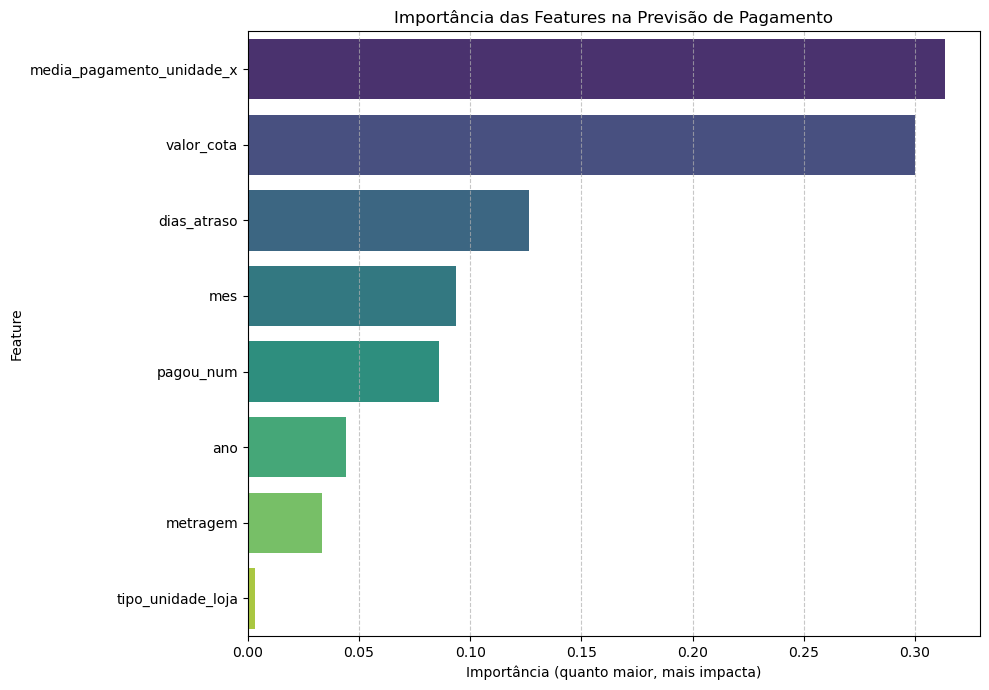


Gráfico de importância das features gerado com sucesso!


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

predio = pd.read_csv('condominio_atualizado.csv')

# --- 2. Preparação de Dados (Revisão da Etapa 4) ---
# Converter a coluna 'pagou' para numérica
predio['pagou_num'] = predio['pagou'].astype(int)

# Calcular e incorporar a média de pagamento por unidade
media_pagamento_por_unidade = predio.groupby("unidade_id")["pagou_num"].mean()
df_media_pagamento = media_pagamento_por_unidade.reset_index()
df_media_pagamento.rename(columns={'pagou_num': 'media_pagamento_unidade'}, inplace=True)
predio = pd.merge(predio, df_media_pagamento, on='unidade_id', how='left')

# Criar colunas temporais
predio['data'] = pd.to_datetime(predio['data']) # Garantir tipo datetime
predio['ano'] = predio['data'].dt.year
predio['mes'] = predio['data'].dt.month

# Codificação da variável categórica 'tipo_unidade'
predio = pd.get_dummies(predio, columns=['tipo_unidade'], drop_first=True)

# Definição da Variável Target 'pagou_proximo_mes'
predio = predio.sort_values(by=['unidade_id', 'data']) 
predio['pagou_proximo_mes'] = predio.groupby('unidade_id')['pagou_num'].shift(-1)
predio.dropna(subset=['pagou_proximo_mes'], inplace=True) # Remover linhas sem próximo mês
predio['pagou_proximo_mes'] = predio['pagou_proximo_mes'].astype(int) # Converter target para inteiro

# --- 3. Seleção Final de Features (X) e Target (y) ---
features = [
    'metragem',
    'valor_cota',
    'dias_atraso',
    'media_pagamento_unidade_x',
    'ano',
    'mes',
    'pagou_num', 
    'tipo_unidade_loja'
]
X = predio[features]
y = predio['pagou_proximo_mes']

# --- 4. Divisão dos Dados em Conjuntos de Treino e Teste ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# --- 5. Treinamento do Modelo ---
print("Treinando o modelo RandomForestClassifier para obter importâncias de features")
modelo_inadimplencia = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
modelo_inadimplencia.fit(X_train, y_train)
print("Modelo treinado com sucesso!")

# --- 6. Gerar o Gráfico de Importância das Features ---
print("\nGerando gráfico de importância das features...")

# Obter as importâncias das features do modelo
importances = modelo_inadimplencia.feature_importances_

# Criar uma Series com as importâncias e os nomes das features
feature_importances = pd.Series(importances, index=X_train.columns)

# Ordenar as features por importância (do maior para o menor)
feature_importances_sorted = feature_importances.sort_values(ascending=False)

# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 7))
sns.barplot(x=feature_importances_sorted.values, y=feature_importances_sorted.index, palette='viridis')
plt.title('Importância das Features na Previsão de Pagamento')
plt.xlabel('Importância (quanto maior, mais impacta)')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [ ]:
### Até esse momento conseguimos prever com uma boa acurácia as unidades que vão pagar, no entanto, precisamos melhorar a acurácia do modelo
### para as unidades que não vao pagar, ou seja, as unidades inadimplentes.
### algumas features nao tem tanta relevancia no modelo, talvez a criação de novas features e o balanceamento de clases possa melhorar a acurária do modelo
### proximas etapas serão ilustrar se existem meses específicos do ano com maior inadimplencia e se há alguma relação com valor da cota,metragem e tipo da unidade.
